In [10]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
notebook_path = '/content/drive/My Drive/Colab Notebooks/phase4_Modeling.ipynb'


In [14]:
import nbformat

with open(notebook_path, 'r') as f:
    nb = nbformat.read(f, as_version=4)

# Optional: Execute each cell
from IPython.display import display, Javascript

for cell in nb.cells:
    if cell.cell_type == 'code':
        exec(cell.source)
    elif cell.cell_type == 'markdown':
        display(Markdown(cell.source))



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Logistic Regression Performance:
Accuracy: 0.8045
Precision: 0.7746
Recall: 0.7432
F1-Score: 0.7586
ROC-AUC: 0.8761



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree Performance:
Accuracy: 0.7542
Precision: 0.7083
Recall: 0.6892
F1-Score: 0.6986
ROC-AUC: 0.7446

Random Forest Performance:
Accuracy: 0.8324
Precision: 0.8333
Recall: 0.7432
F1-Score: 0.7857
ROC-AUC: 0.8894

Support Vector Machine Performance:
Accuracy: 0.5978
Precision: 0.6667
Recall: 0.0541
F1-Score: 0.1000
ROC-AUC: 0.7416

Gradient Boosting Machine Performance:
Accuracy: 0.8156
Precision: 0.8060
Recall: 0.7297
F1-Score: 0.7660
ROC-AUC: 0.8712

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Tuned Random Forest Performance:
Accuracy: 0.8156
Precision: 0.8254
Recall: 0.7027
F1-Score: 0.7591
ROC-AUC: 0.8915

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for GBM:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}

Tuned GBM Performance:
Accuracy: 0.8156
Precision: 0.8060
Reca

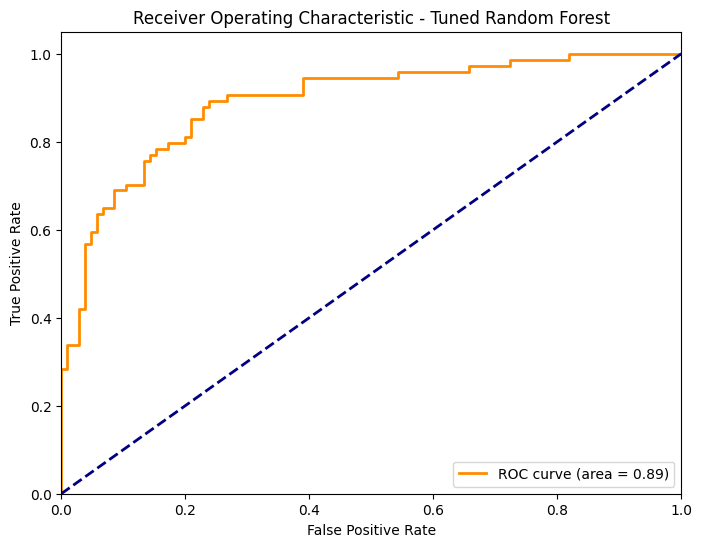

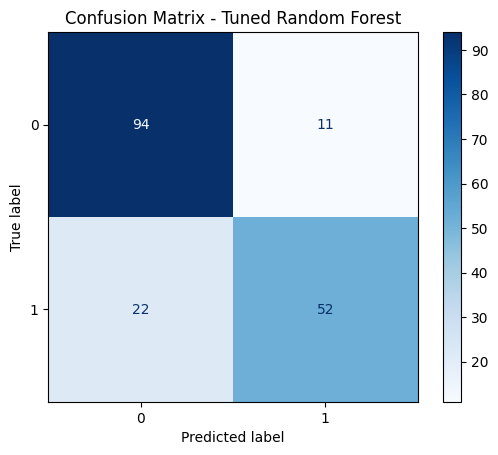

In [16]:
# Assuming 'best_model' is either 'Tuned Random Forest' or 'Tuned GBM'
if best_model == 'Tuned Random Forest':
    model = best_rf
elif best_model == 'Tuned GBM':
    model = best_gbm
else:
    model = None

if model:
    # Predict probabilities for ROC curve
    y_pred_proba = model.predict_proba(X_val)[:,1]

    # ROC Curve
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt

    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {best_model}')
    plt.legend(loc="lower right")
    plt.show()

    # Confusion Matrix
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

    y_pred = model.predict(X_val)
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {best_model}')
    plt.show()
